In [208]:
import zipfile
import pandas as pd
from pandas import DataFrame, Series
from io import TextIOWrapper
from zipfile import ZipFile, ZIP_STORED, ZIP_DEFLATED
import csv
import re
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
import datetime
import calendar
import numpy as np

In [59]:
matplotlib.rcParams["font.size"]=18

In [60]:
def read_csv(name):
    with open(name, 'rb') as WI:
        reader = csv.reader(TextIOWrapper(WI))
        for row in reader:
            yield row
            
def make_df(name):
    reader = read_csv(name)
    header = next(reader)
    df = DataFrame(reader)
    df.columns = header
    return df

In [70]:
df_2015 = make_df('General_Payment_Data___Detailed_Dataset_2015_Reporting_Year-2015.csv')
df_2016 = make_df('General_Payment_Data___Detailed_Dataset_2016_Reporting_Year-2016.csv')
df_2017 = make_df('General_Payment_Data___Detailed_Dataset_2017_Reporting_Year-2017.csv')
df_2018 = make_df('General_Payment_Data___Detailed_Dataset_2018_Reporting_Year-2018.csv')

In [76]:
df = df_2015.append(df_2016, ignore_index=True).append(df_2017, ignore_index=True).append(df_2018, ignore_index=True)

In [77]:
df['Date_of_Payment']= pd.to_datetime(df['Date_of_Payment'])
df['Total_Amount_of_Payment_USDollars']=df['Total_Amount_of_Payment_USDollars'].str.replace(',',"").astype(float)

In [86]:
df = df.replace(np.nan, '', regex=True)

In [95]:
df['day'] = df['Date_of_Payment'].dt.day
df['month'] = df['Date_of_Payment'].dt.month
df['year'] = df['Date_of_Payment'].dt.year

# DRUG AND MEDICAL COMPANIES PAY A LOT OF MONEY TO PHYSICIANS AND TEACHING

### 1. How much money in total typically gets paid out on a given day over time in January?

In [106]:
df_january_2015 = df[(df['year']==2015) & (df['month']==1)]
df_january_2016 = df[(df['year']==2016) & (df['month']==1)]
df_january_2017 = df[(df['year']==2017) & (df['month']==1)]
df_january_2018 = df[(df['year']==2018) & (df['month']==1)]

In [119]:
df_jan_15 = df_january_2015.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
df_jan_16 = df_january_2016.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
df_jan_17 = df_january_2017.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
df_jan_18 = df_january_2018.groupby('day').sum()['Total_Amount_of_Payment_USDollars']

In [124]:
df_january = DataFrame({
    '2015': df_jan_15,
    '2016': df_jan_16,
    '2017': df_jan_17,
    '2018': df_jan_18 })

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text xticklabel objects>)

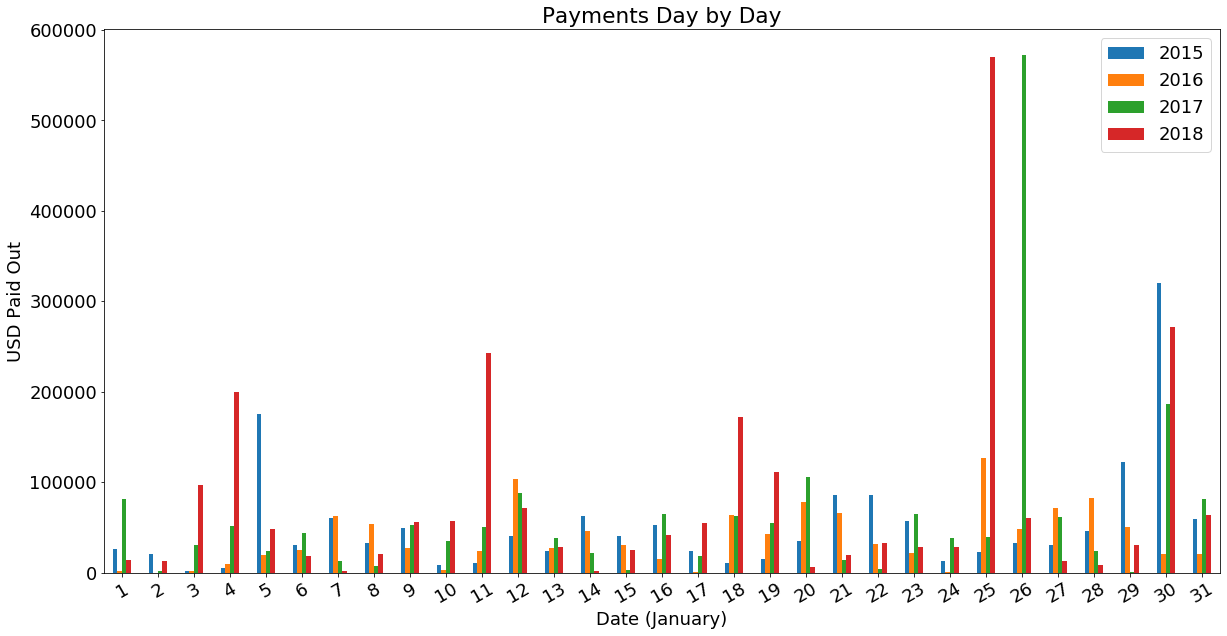

In [279]:
fig, ax = plt.subplots(figsize=(20,10))
# ax.bar(x=df_1['Date_of_Payment'],height=df_1['Total_Amount_of_Payment_USDollars'])
df_january.plot.bar(ax=ax, title = 'Payments Day by Day')
ax.set_ylabel('USD Paid Out')
ax.set_xlabel('Date (January)')
plt.xticks(rotation=30)

## Do other months have outrageous payouts like that?


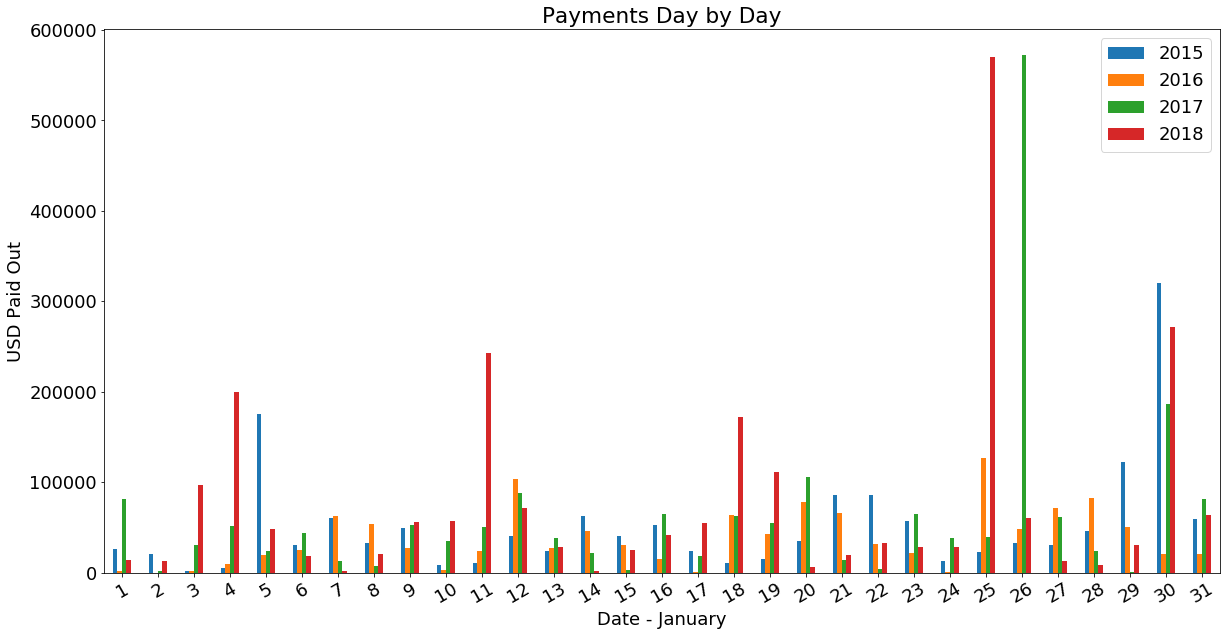

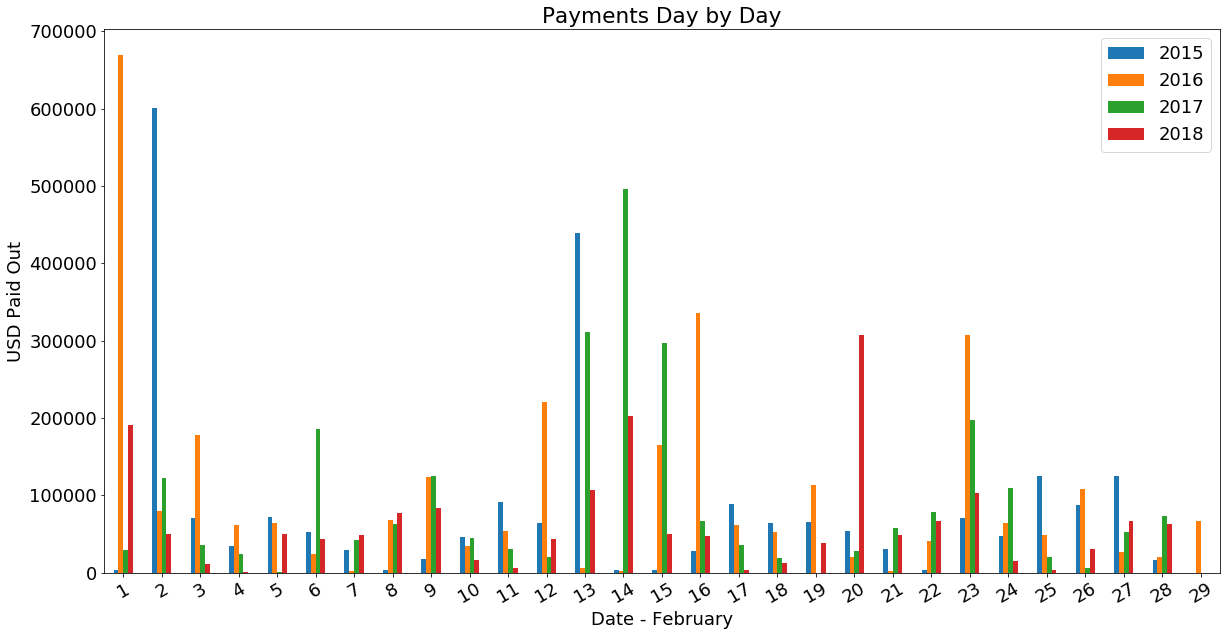

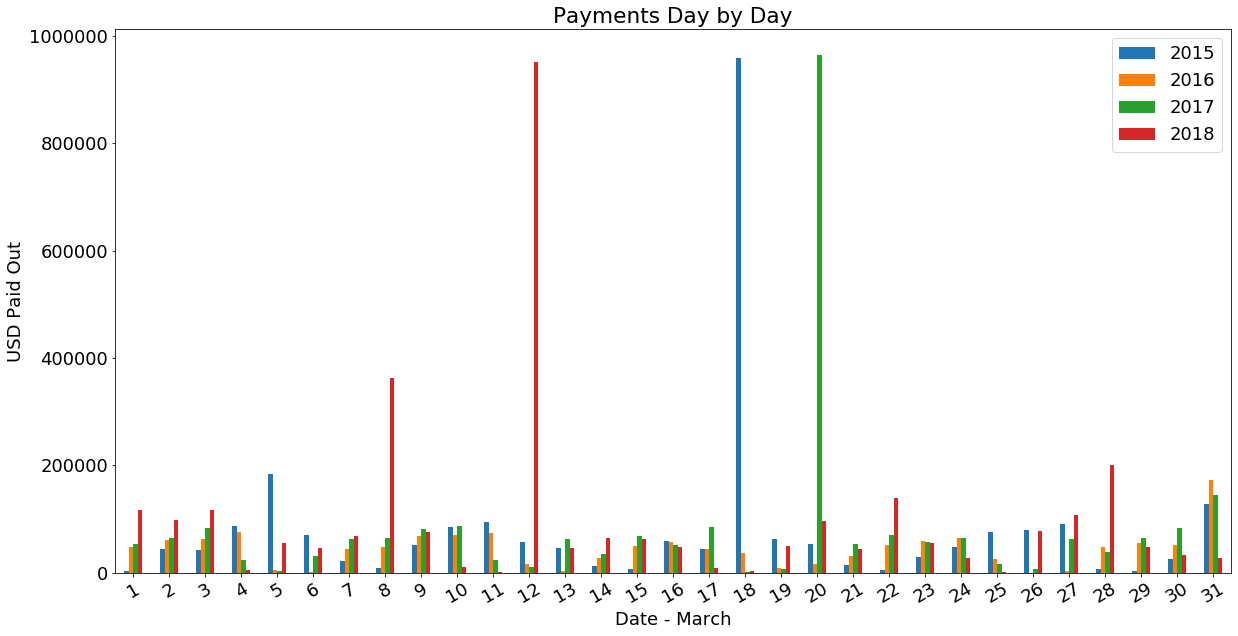

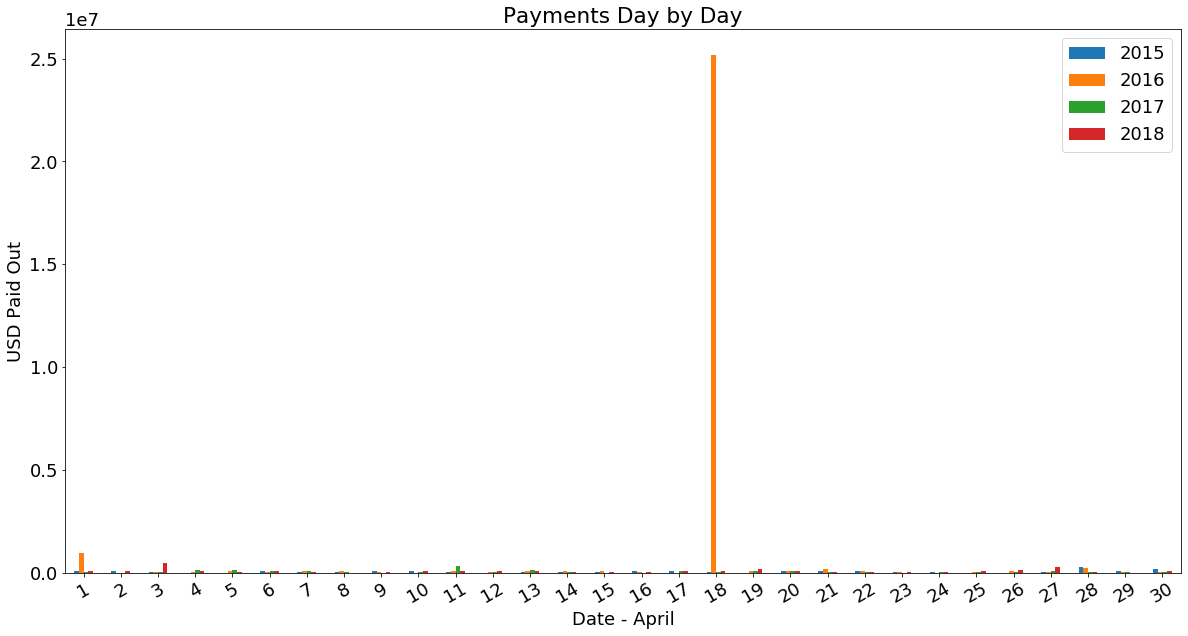

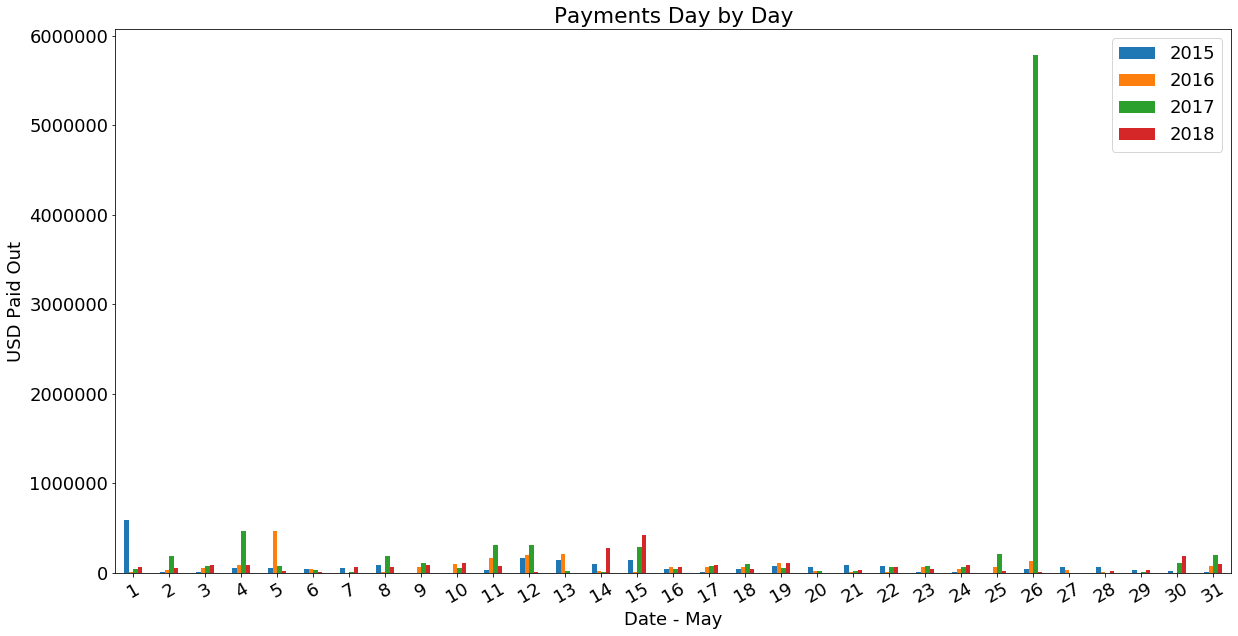

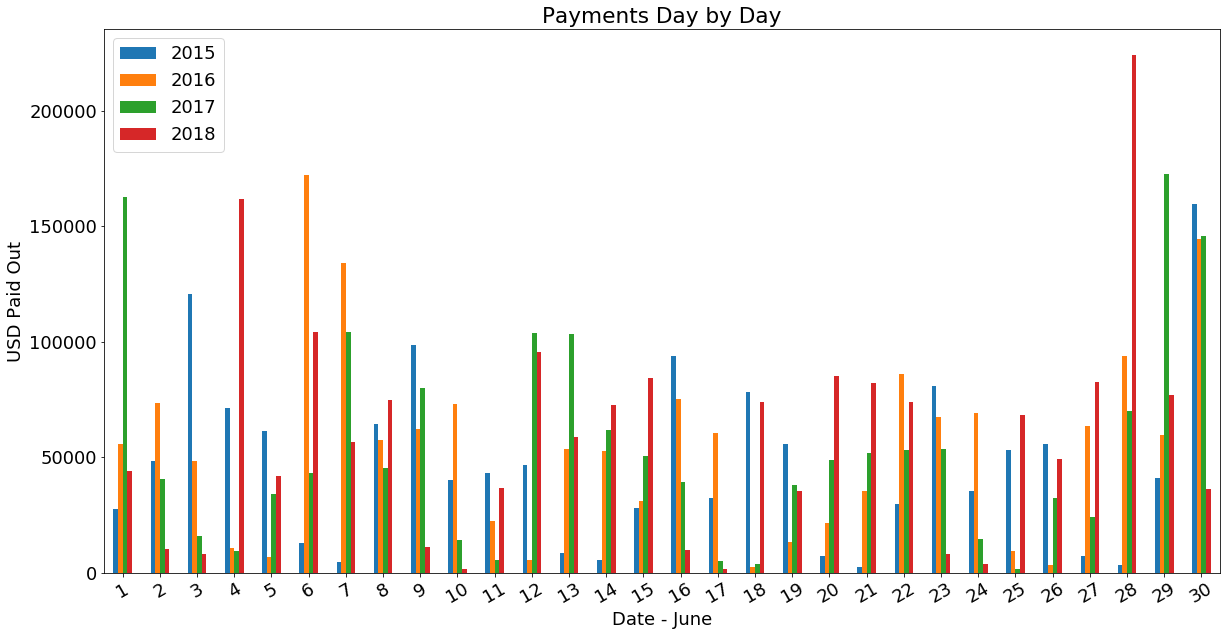

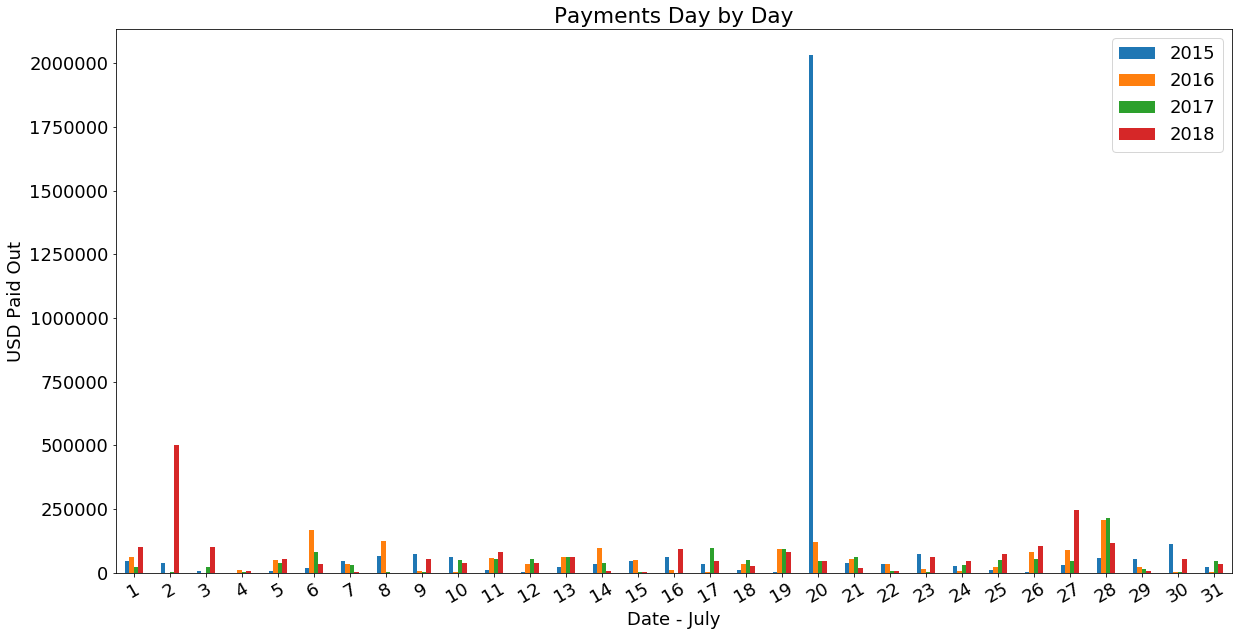

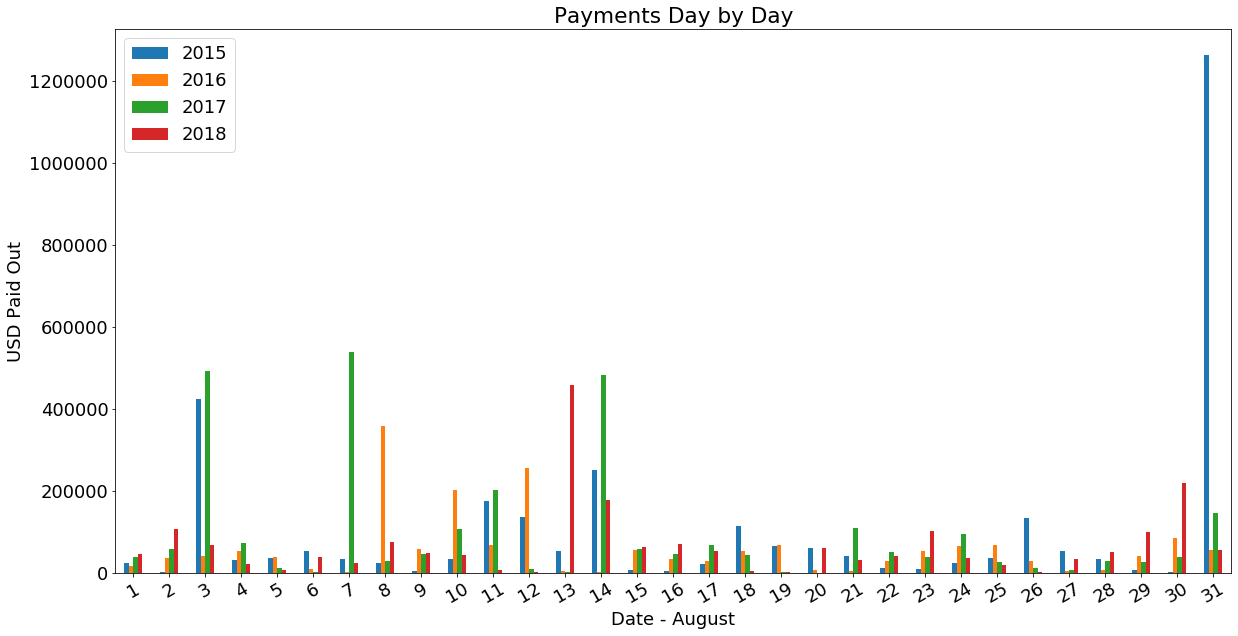

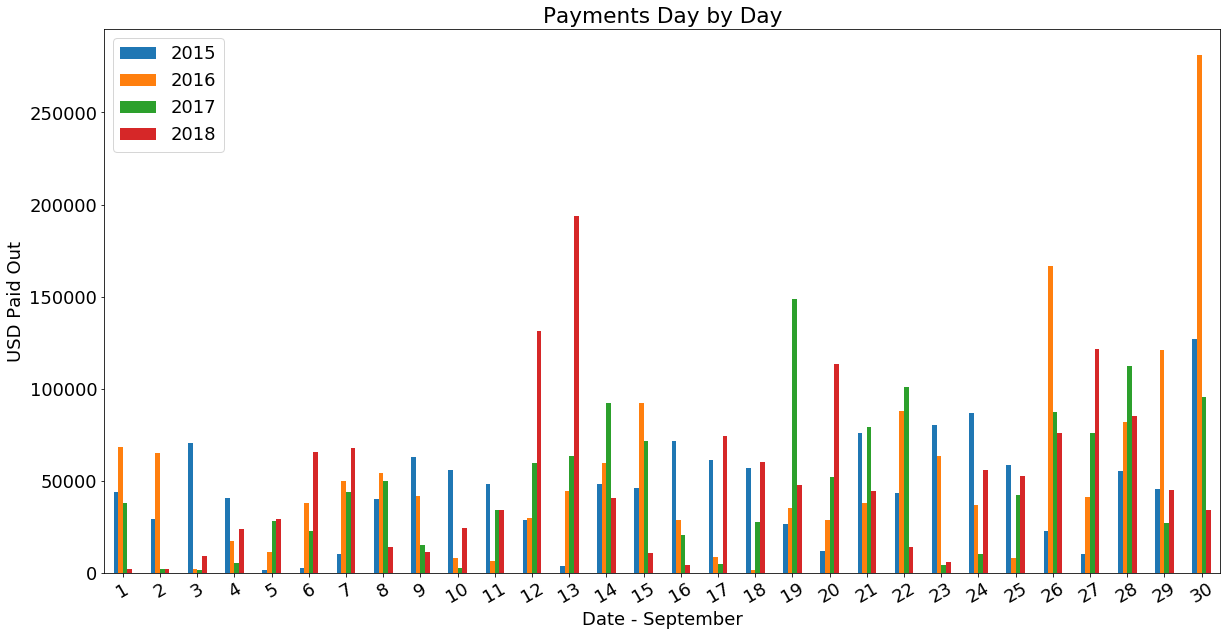

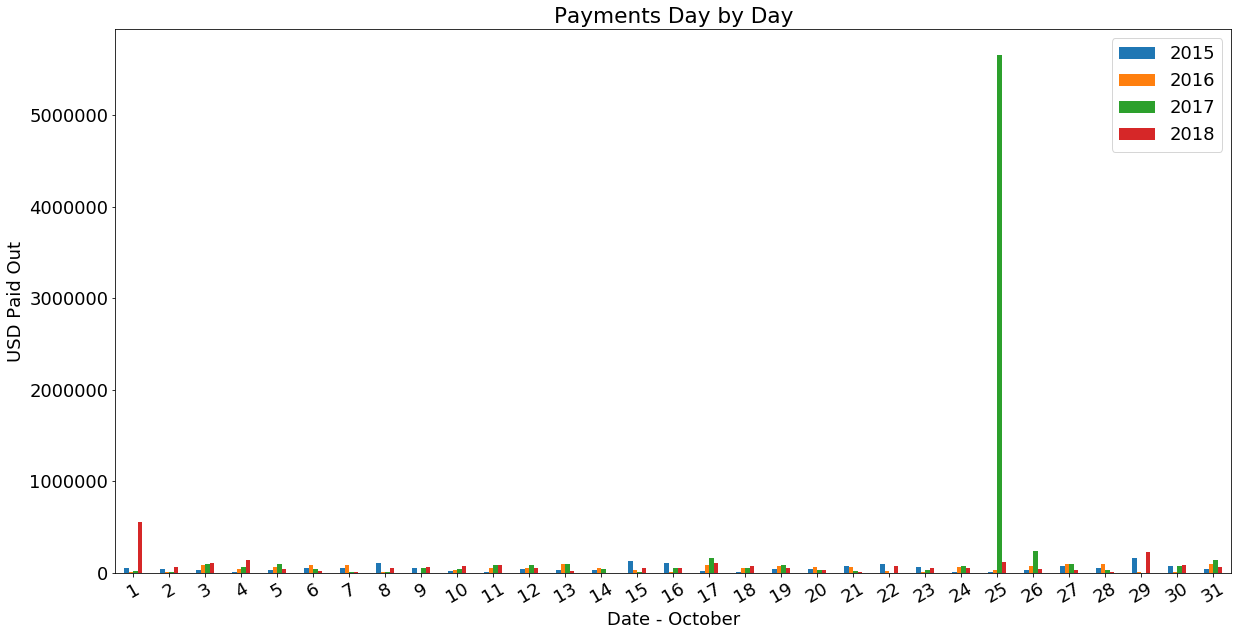

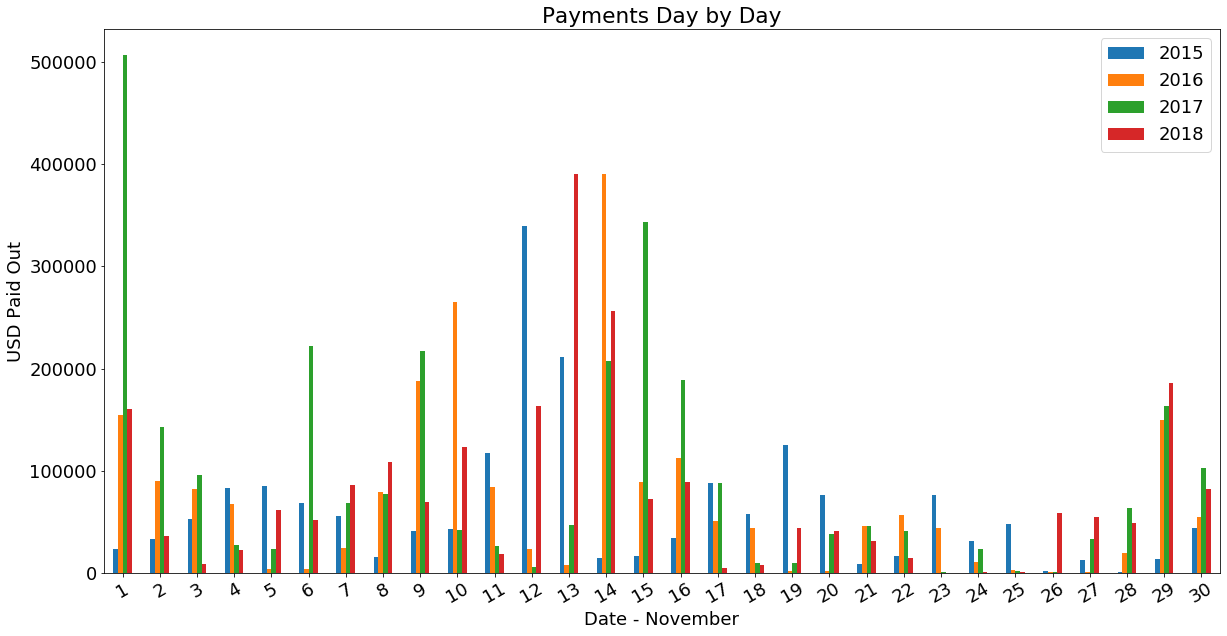

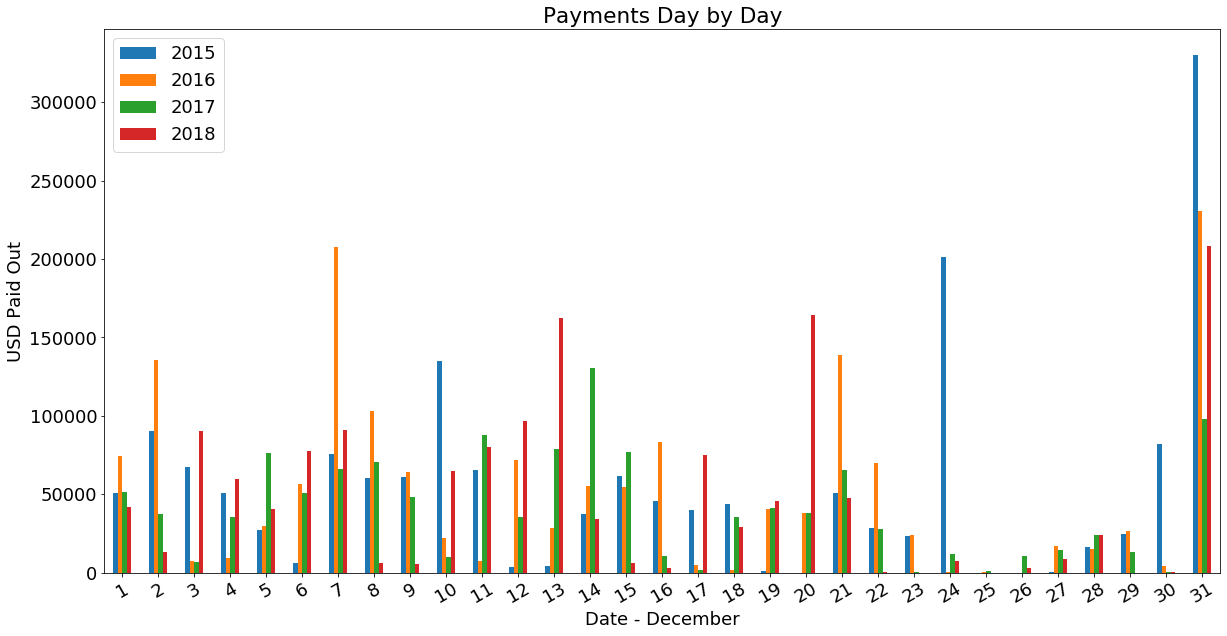

In [282]:
for i in range(1,13):
    df_january_2015 = df[(df['year']==2015) & (df['month']==i)]
    df_january_2016 = df[(df['year']==2016) & (df['month']==i)]
    df_january_2017 = df[(df['year']==2017) & (df['month']==i)]
    df_january_2018 = df[(df['year']==2018) & (df['month']==i)]
    
    df_jan_15 = df_january_2015.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
    df_jan_16 = df_january_2016.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
    df_jan_17 = df_january_2017.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
    df_jan_18 = df_january_2018.groupby('day').sum()['Total_Amount_of_Payment_USDollars']
    
    df_month = DataFrame({
        '2015': df_jan_15,
        '2016': df_jan_16,
        '2017': df_jan_17,
        '2018': df_jan_18 })
    
    fig, ax = plt.subplots(figsize=(20,10))
    df_month.plot.bar(ax=ax, title = 'Payments Day by Day')
    ax.set_ylabel('USD Paid Out')
    ax.set_xlabel('Date - '+calendar.month_name[i])
    plt.xticks(rotation=30)

## 3. What do payments look like throughout the entire year?

In [266]:
df_2015 = df[df['year']==2015]
df_2016 = df[df['year']==2016]
df_2017 = df[df['year']==2017]
df_2018 = df[df['year']==2018]

df_2015 = df_2015.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars']
df_2016 = df_2016.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars']
df_2017 = df_2017.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars']
df_2018 = df_2018.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars']

# df_annual = DataFrame({
#     '2015': df_2015,
#     '2016': df_2016,
#     '2017': df_2017,
#     '2018': df_2018 })

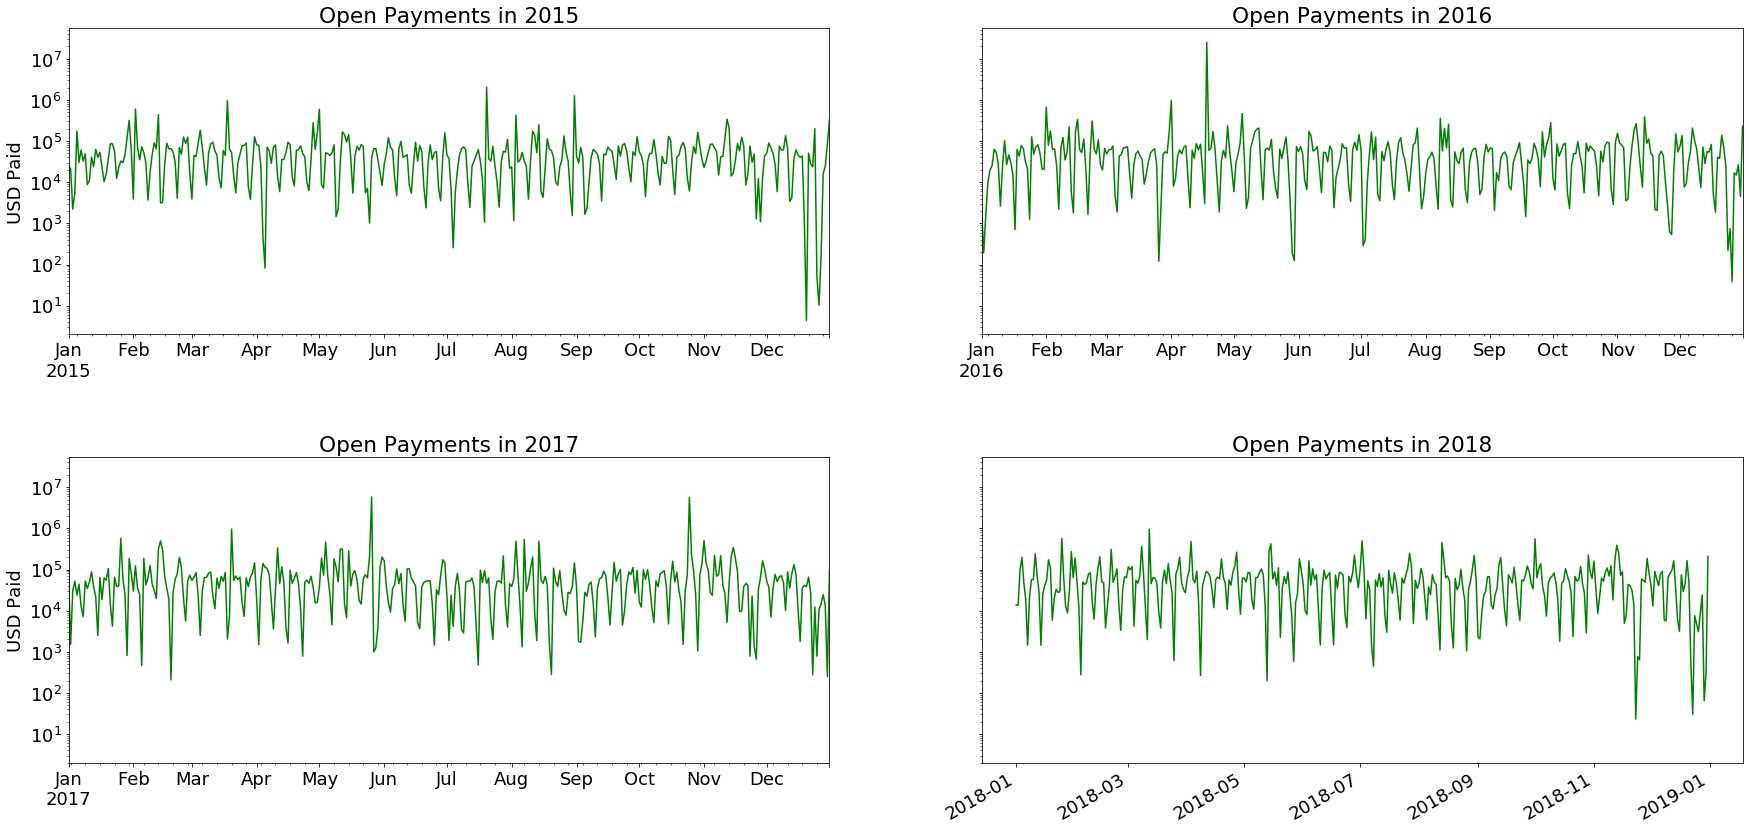

In [275]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(30,15), sharey=True)
ax_list = list(ax)
df_2015.plot.line(ax = ax_list[0][0], title = "Open Payments in 2015", color='green',logy=True)
df_2016.plot.line(ax = ax_list[0][1], title = "Open Payments in 2016", color='green')
df_2017.plot.line(ax = ax_list[1][0], title = "Open Payments in 2017", color='green')
df_2018.plot.line(ax = ax_list[1][1], title = "Open Payments in 2018", color='green')
# ax_list[0][0].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax_list[1][1].set_xlabel("")
ax_list[1][1].set_ylabel("USD Paid")
ax_list[1][0].set_xlabel("")
ax_list[1][0].set_ylabel("USD Paid")
ax_list[0][1].set_xlabel("")
ax_list[0][1].set_ylabel("USD Paid")
ax_list[0][0].set_xlabel("")
ax_list[0][0].set_ylabel("USD Paid")

# ax.set_ylabel('USD Paid')
# ax.set_xlabel('Date of Payment')
plt.subplots_adjust(wspace=0.2, hspace=0.4)


## Average Payment Per Day

In [276]:
df.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars'].mean()

91500.22686046512

In [277]:
df.groupby(['Date_of_Payment']).sum()['Total_Amount_of_Payment_USDollars'].median()

46553.765000000014

## Maximum Payments (Payments Aggregated by Day)

In [278]:
df_daily = df.groupby(['Date_of_Payment']).sum()
df_daily[df_daily['Total_Amount_of_Payment_USDollars']==df_daily['Total_Amount_of_Payment_USDollars'].max()]

,Total_Amount_of_Payment_USDollars,day,month,year
Date_of_Payment,,,,
2016-04-18,25176913.91,6732,1496,753984


## Minimum Payments (Payments Aggregated by Day)

In [11]:
df_daily[df_daily['Total_Amount_of_Payment_USDollars']==df_daily['Total_Amount_of_Payment_USDollars'].min()]

,Total_Amount_of_Payment_USDollars
Date_of_Payment,
2018-11-23,23.17


Text(0, 0.5, '')

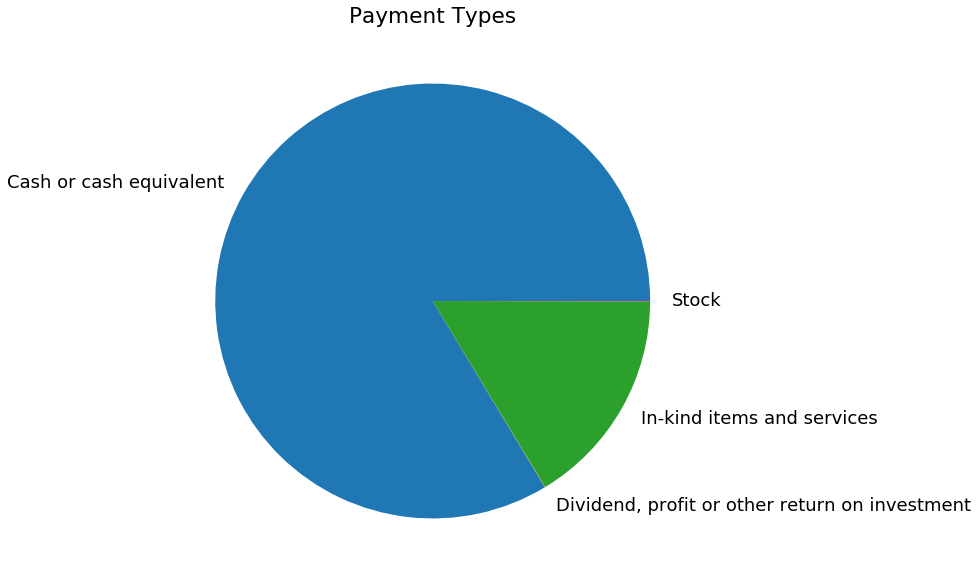

In [29]:
df_pmt = df.groupby('Form_of_Payment_or_Transfer_of_Value').sum()
ax = df_pmt.plot.pie(y='Total_Amount_of_Payment_USDollars', legend=False, figsize=(10,10))
ax.set_title('Payment Types')
ax.set_ylabel("")

## How is the Money being used? - Wat is dis?

Text(0.5, 0, '')

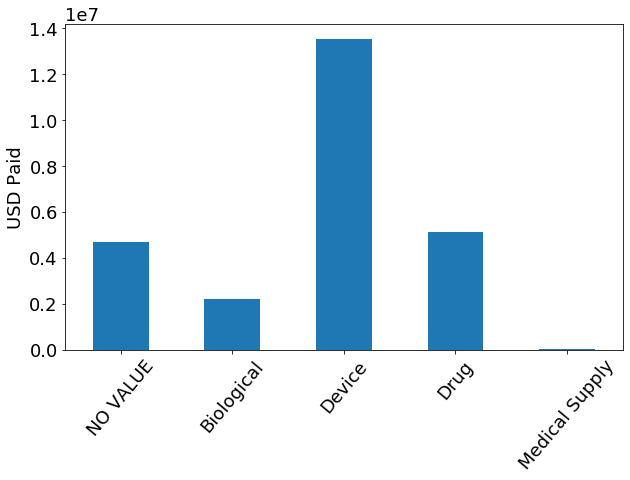

In [37]:
df.columns.str.contains("Drug_or_Biological_or_Device_or_Medical_Supply")
df.filter(regex='Drug_or_Biological', axis=1)

df_spent = df[['Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1','Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1',"Total_Amount_of_Payment_USDollars","Nature_of_Payment_or_Transfer_of_Value"]]
ax = df_spent.groupby('Indicate_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum().plot.bar(legend=False, figsize=(10,6))
ax.set_xticklabels(['NO VALUE','Biological','Device','Drug','Medical Supply'],rotation=50)
ax.set_ylabel('USD Paid')
ax.set_xlabel('')

Text(0, 0.5, 'USD Paid')

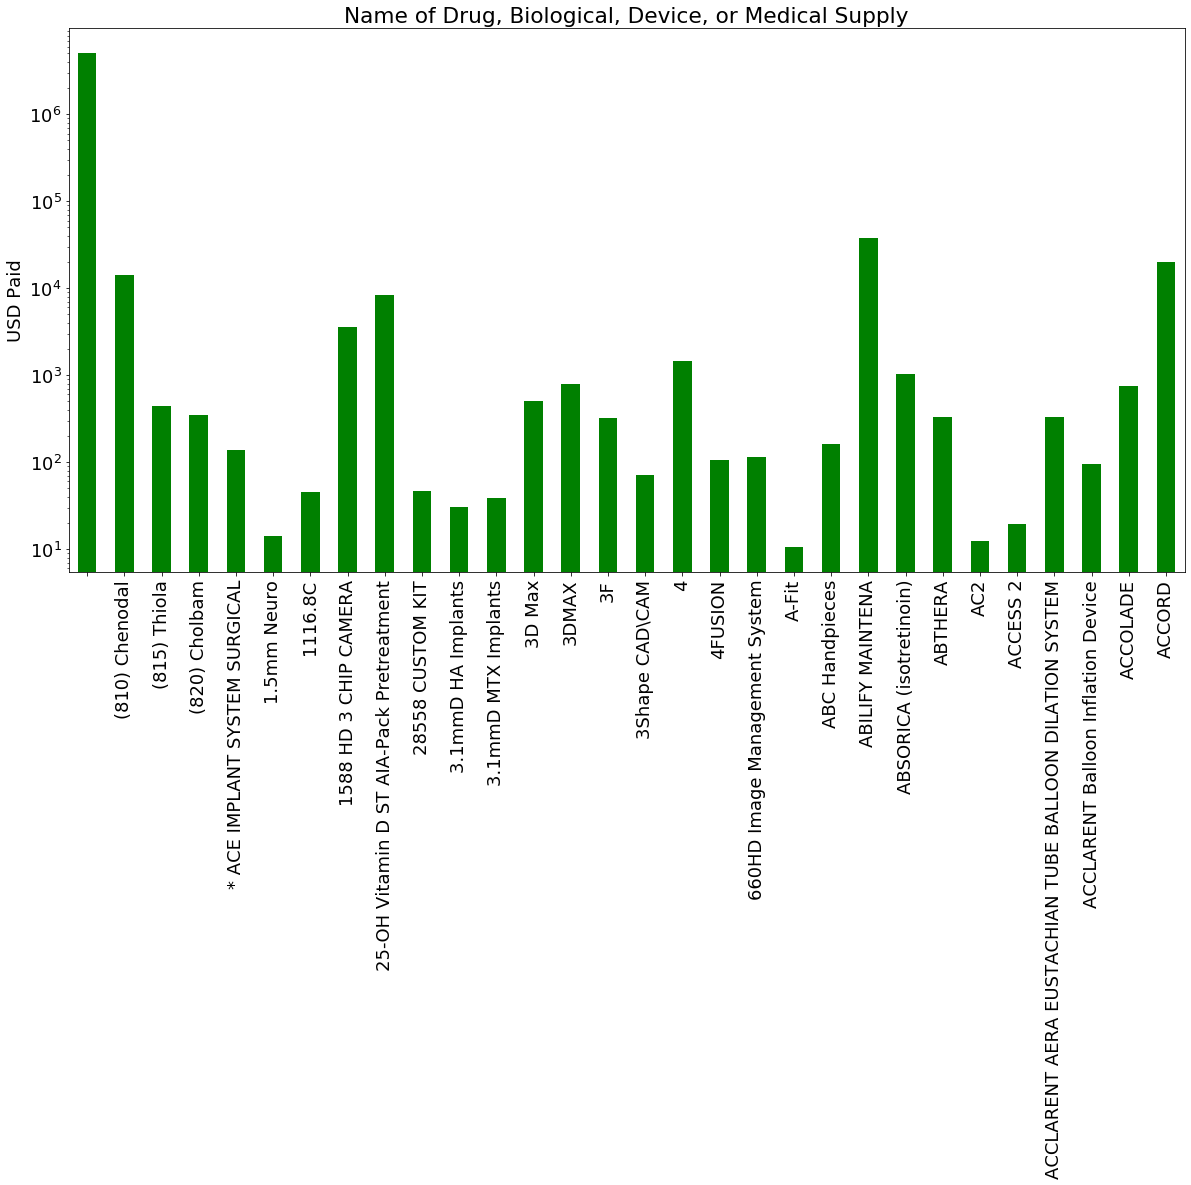

In [49]:
# df_new = df_spent.plot.bar(x='Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1', y='Total_Amount_of_Payment_USDollars')
# df_new = df_spent.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False).head(20)
# df_new.groupby('Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum()
df_new = df_spent.groupby('Name_of_Drug_or_Biological_or_Device_or_Medical_Supply_1').sum().head(30)
ax_1 = df_new.plot.bar(y='Total_Amount_of_Payment_USDollars',figsize=(20,10), legend = False,logy=True, color= 'green')
# plt.xticks(rotation=60)
ax_1.set_xlabel("")
ax_1.set_title("Name of Drug, Biological, Device, or Medical Supply")
ax_1.set_ylabel("USD Paid")
# ax_1.text(0, 1, 'NO VALUE',transform=ax.transAxes)

### So even though in total, devices is the category with highest paid amount. However, when looking at individual payments, "no value" dominates 

Text(0.5, 0, '')

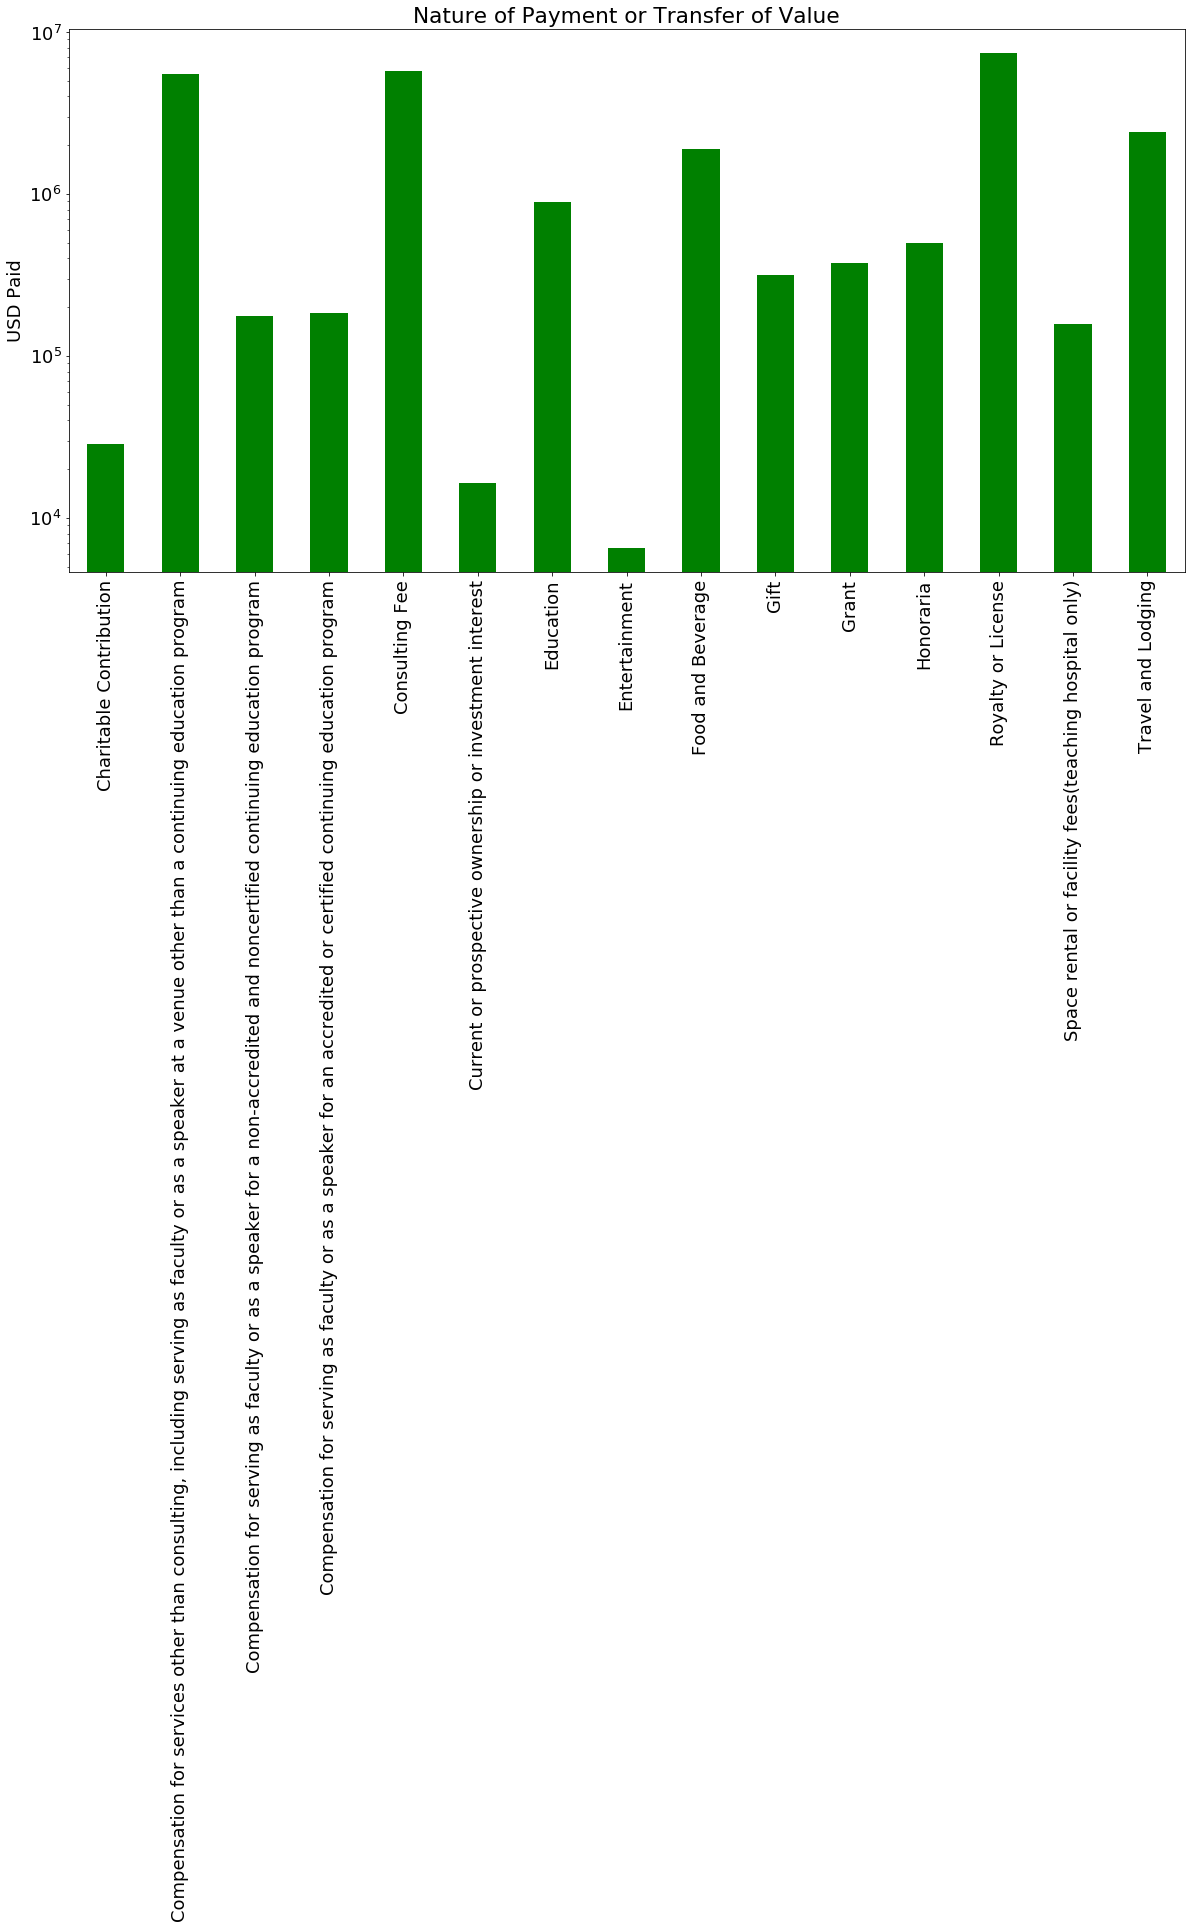

In [48]:
df_nature = df_spent.groupby('Nature_of_Payment_or_Transfer_of_Value').sum()
ax_2 = df_nature.plot.bar(y='Total_Amount_of_Payment_USDollars',figsize=(20,10), legend = False,logy=True, color= 'green')
ax_2.set_title("Nature of Payment or Transfer of Value")
ax_2.set_ylabel("USD Paid")
ax_2.set_xlabel("")

## Number of Payments In Total Amount

Text(0.5, 1.0, 'Frequence of Payments Per Total Amount')

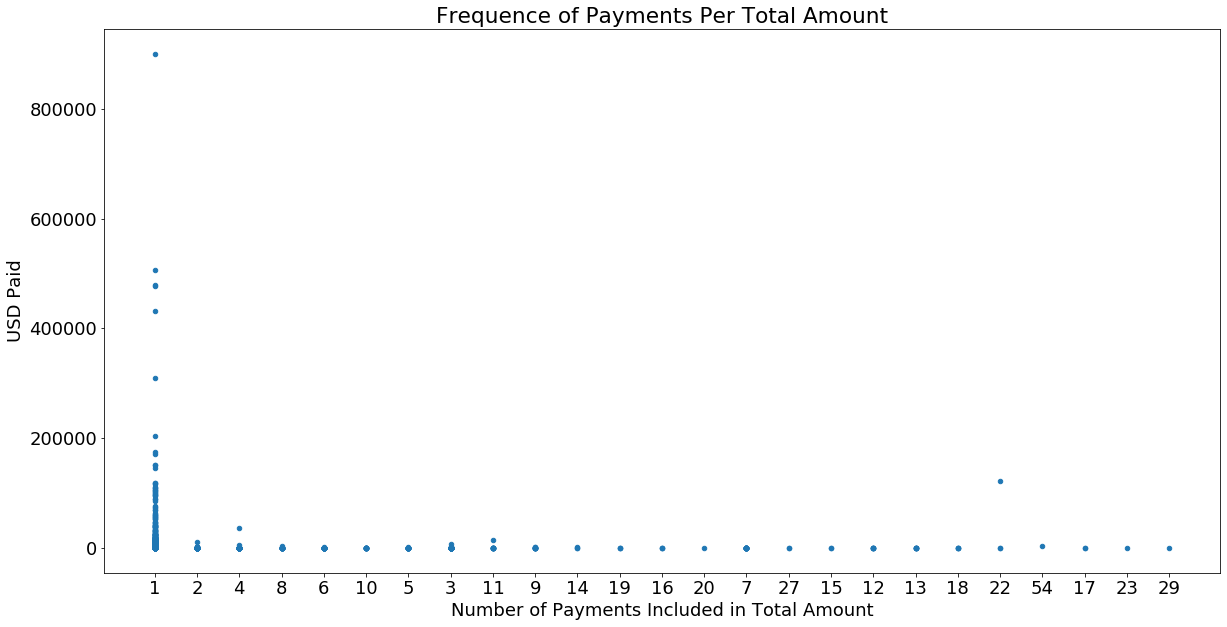

In [7]:
df_num = df.groupby('Number_of_Payments_Included_in_Total_Amount').sum()
ax_3 = df.plot.scatter(x='Number_of_Payments_Included_in_Total_Amount',y='Total_Amount_of_Payment_USDollars', figsize=(20,10))
ax_3.set_xlabel('Number of Payments Included in Total Amount')
ax_3.set_ylabel('USD Paid')
ax_3.set_title('Frequence of Payments Per Total Amount')

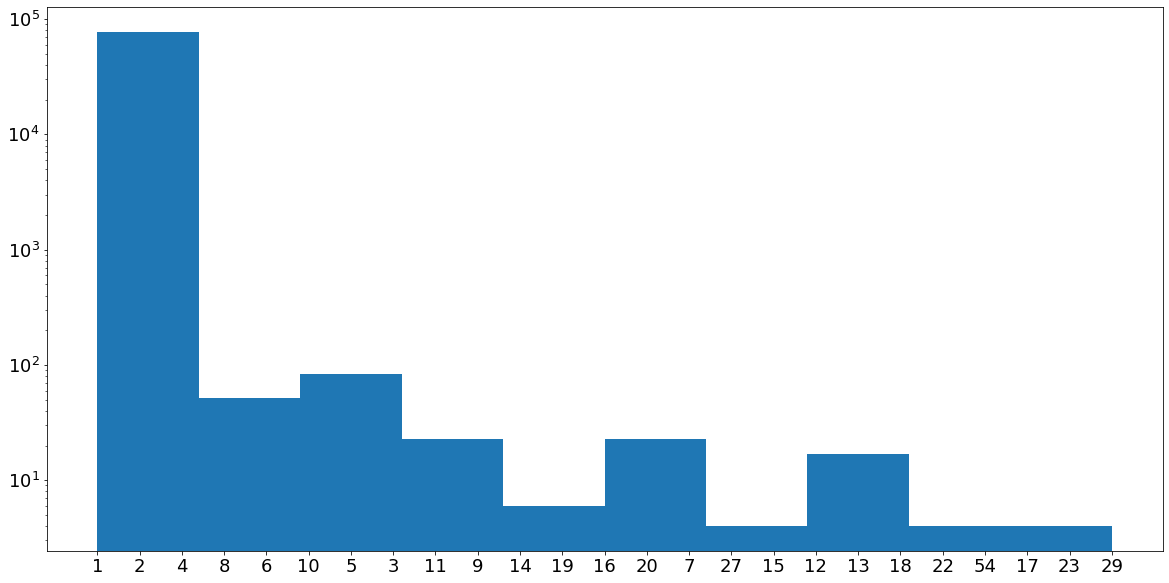

In [35]:
fig, ax = plt.subplots(figsize=(20,10))
plt.hist(df['Number_of_Payments_Included_in_Total_Amount'], bins = 10)
plt.yscale('log')

## Recipients (Is this right?)

In [96]:
# df_rec = df.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name').sum()
df_rec = df[['Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name','Total_Amount_of_Payment_USDollars']]
df_rec.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)

#the top 5
df2 = df_rec.sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)[:100].copy()

#others
new_row = pd.DataFrame(data = {
    'Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name' : ['others'],
    'Total_Amount_of_Payment_USDollars' : [df['Total_Amount_of_Payment_USDollars'][100:].sum()]
})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
df2.groupby('Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name').sum().sort_values(by='Total_Amount_of_Payment_USDollars', ascending=False)

,Total_Amount_of_Payment_USDollars
Submitting_Applicable_Manufacturer_or_Applicable_GPO_Name,
others,25526811.26
"CooperSurgical, Inc.",1895237.04
"Zimmer Biomet Holdings, Inc.",1249562.46
Stryker Corporation,1007917.03
"Smith & Nephew, Inc.",900000.00
"Wright Medical Technology, Inc.",697362.38
Merit Medical Systems Inc,397114.05
KARL STORZ Endoscopy-America,335221.92
"Medtronic USA, Inc.",332843.00


Text(0, 0.5, '')

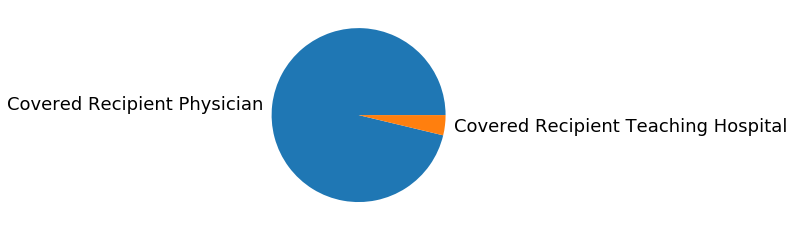

In [49]:
ax = df.groupby('Covered_Recipient_Type').sum().plot.pie(y='Total_Amount_of_Payment_USDollars', legend = False)
ax.set_ylabel("")

In [47]:
df.groupby('Covered_Recipient_Type').sum()

,Total_Amount_of_Payment_USDollars
Covered_Recipient_Type,
Covered Recipient Physician,24584011.13
Covered Recipient Teaching Hospital,955613.78
